In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

/Users/kishan/Desktop/python/env/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [13]:
df_customers = pd.read_csv('Customers.csv')
df_transactions = pd.read_csv('Transactions.csv')

df = pd.merge(df_transactions, df_customers, on='CustomerID', how='left')

In [14]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [15]:
df.shape

(1000, 10)

In [16]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [17]:
df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [18]:
# Transaction Count per Region
region_transaction_count = df.groupby('Region')['TransactionID'].nunique()
print("\nTransactions by Region:")
print(region_transaction_count)


Transactions by Region:
Region
Asia             218
Europe           234
North America    244
South America    304
Name: TransactionID, dtype: int64


In [29]:
# we can see that South America Alone contributes 30.4% of transaction.
# North America and South America together contributes 54.8% of transaction.

/var/folders/5g/_kblnvd93wz4nr8svk5h7qhh0000gn/T/ipykernel_22323/697313785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_transaction_count.index, y=region_transaction_count.values, palette='viridis')


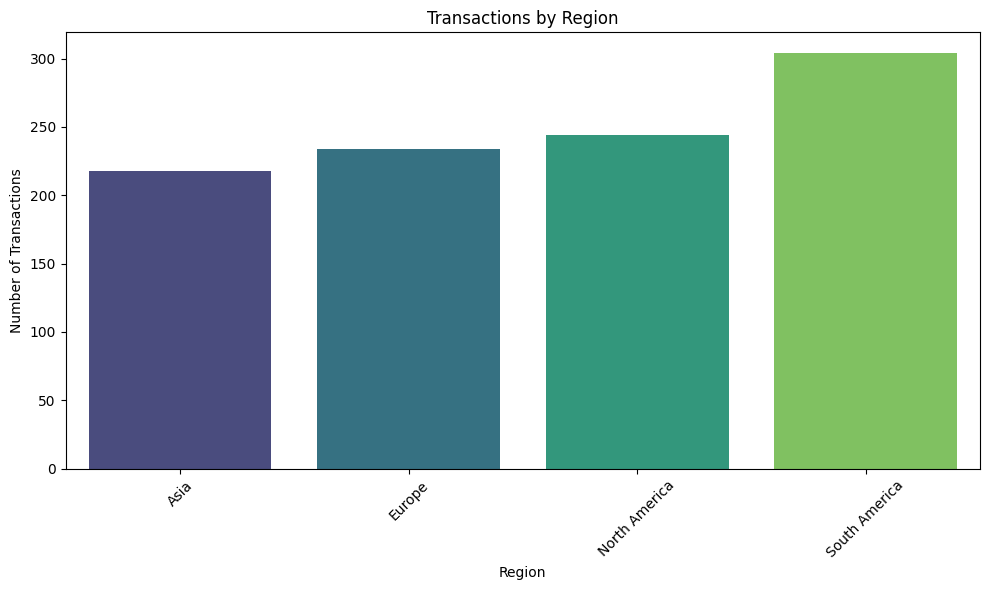

In [20]:
# Plot Transactions by Region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_transaction_count.index, y=region_transaction_count.values, palette='viridis')
plt.title('Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## We can see that South America has the highest no. of transaction
## which means we are doing good in South America 
## But we need to Focus on Asia As we lag in transaction as well as signups . (Need to focus Marketing in asia)

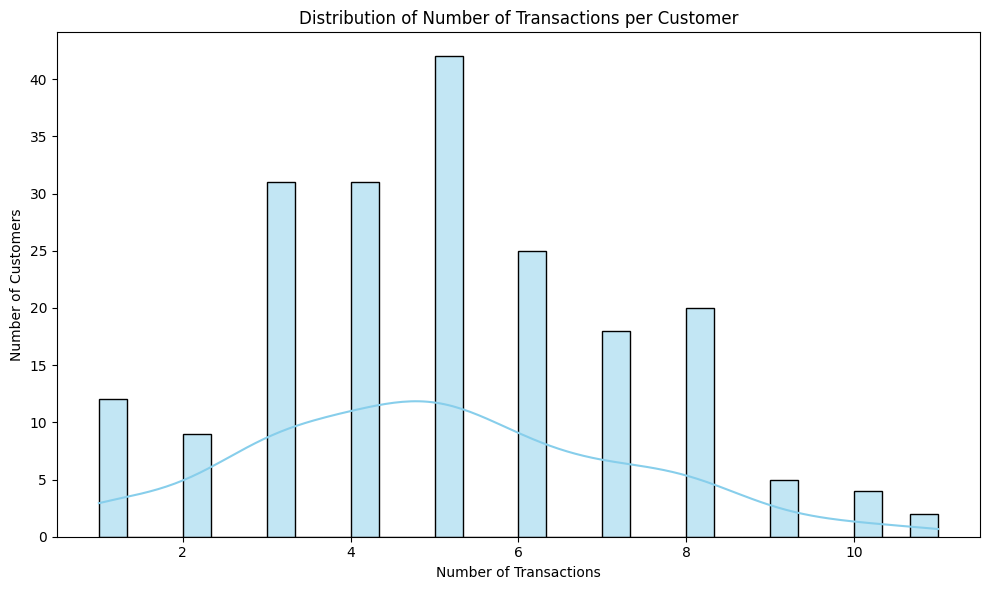

In [19]:
# Number of Transactions per Customer
customer_transaction_count = df.groupby('CustomerID')['TransactionID'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(customer_transaction_count, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Number of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

## the Average no. of transaction per customer is more than 1  which shows good retention/repeat customer 
## with close to a normal distribution

In [22]:
# Total Spend per Customer
df['TotalSpend'] = df['Quantity'] * df['Price']
customer_total_spend = df.groupby('CustomerID')['TotalSpend'].sum()
customer_total_spend

CustomerID
C0001    3354.52
C0002    1862.74
C0003    2725.38
C0004    5354.88
C0005    2034.24
          ...   
C0196    4982.88
C0197    1928.65
C0198     931.83
C0199    1979.28
C0200    4758.60
Name: TotalSpend, Length: 199, dtype: float64

/var/folders/5g/_kblnvd93wz4nr8svk5h7qhh0000gn/T/ipykernel_22323/3350674727.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg_spend.index, y=region_avg_spend.values, palette='plasma')


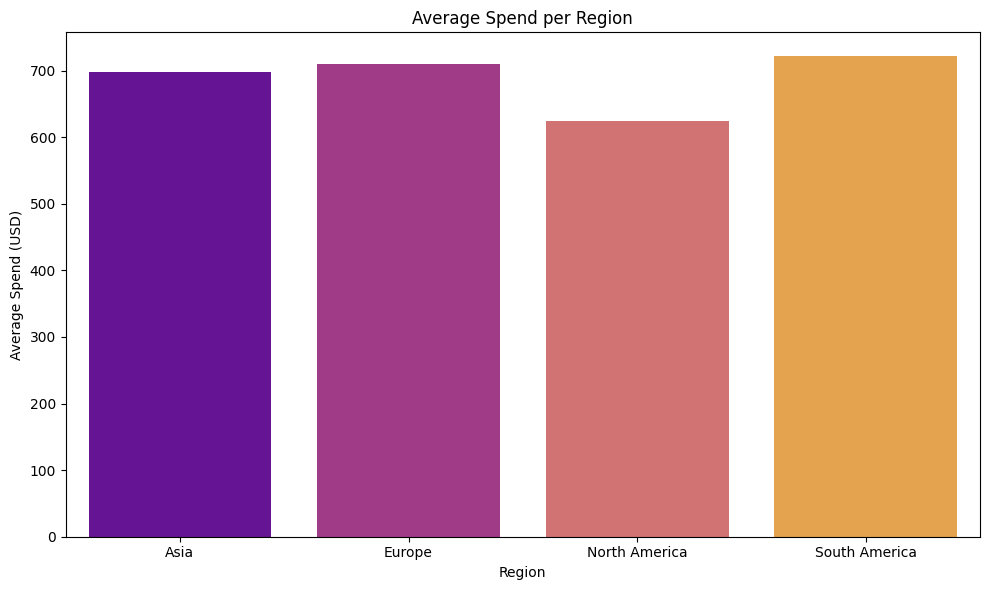

In [23]:

# Average Spend per Region
region_avg_spend = df.groupby('Region')['TotalSpend'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_avg_spend.index, y=region_avg_spend.values, palette='plasma')
plt.title('Average Spend per Region')
plt.xlabel('Region')
plt.ylabel('Average Spend (USD)')
plt.tight_layout()
plt.show()

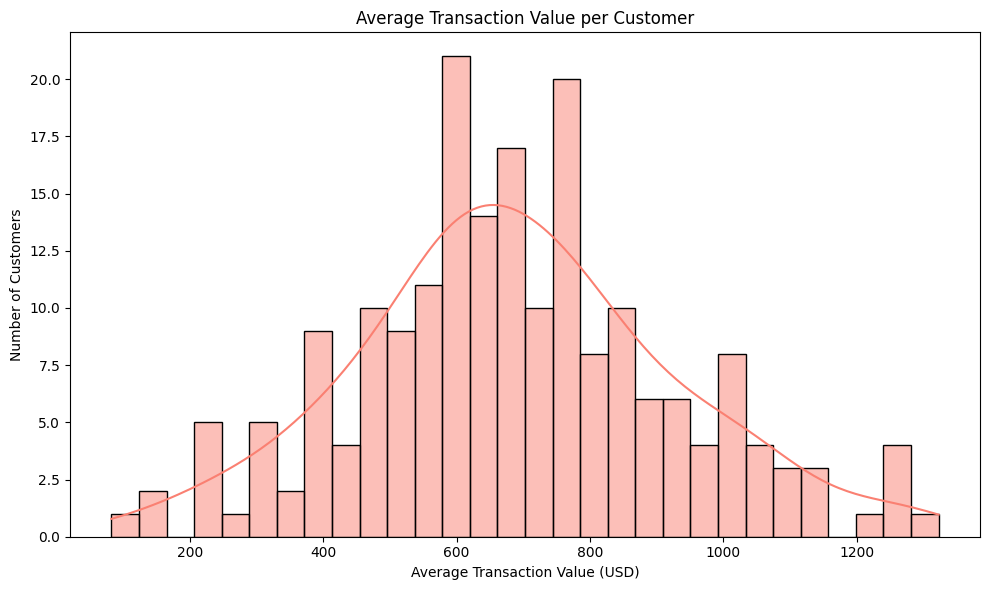

In [24]:
# Average Transaction Value per Customer
df['TransactionValue'] = df['Quantity'] * df['Price']
customer_avg_transaction_value = df.groupby('CustomerID')['TransactionValue'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(customer_avg_transaction_value, bins=30, kde=True, color='salmon')
plt.title('Average Transaction Value per Customer')
plt.xlabel('Average Transaction Value (USD)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [ ]:
# Average spend is following a normal distribution 

/var/folders/5g/_kblnvd93wz4nr8svk5h7qhh0000gn/T/ipykernel_22323/3042820079.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg_transaction_value.index, y=region_avg_transaction_value.values, palette='plasma')


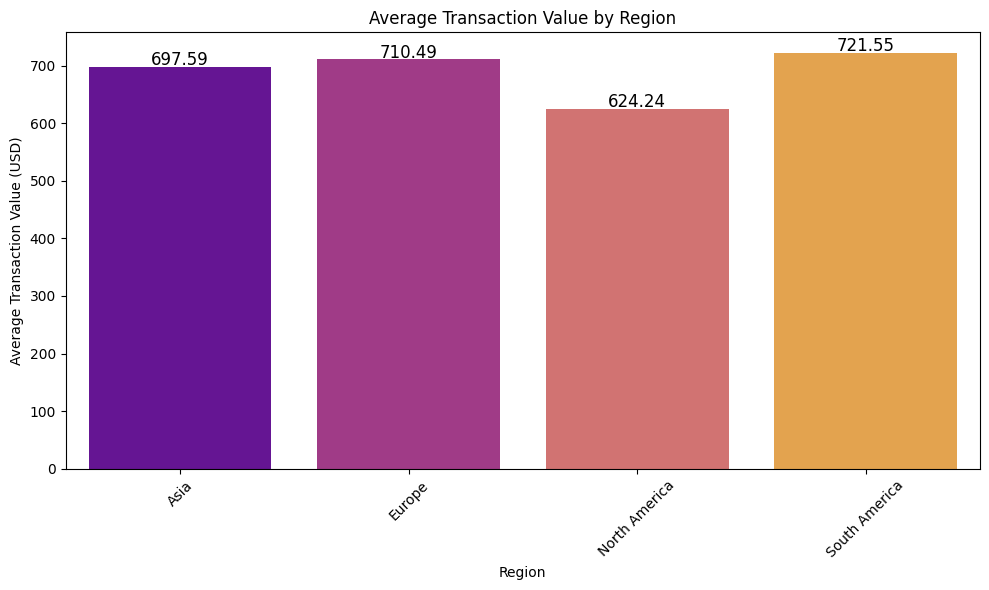

In [28]:
# Calculate the total transaction value (Quantity * Price)
df['TransactionValue'] = df['Quantity'] * df['Price']

# Calculate the total transaction value and number of transactions per region
region_total_value = df.groupby('Region')['TransactionValue'].sum()

# Count the number of transactions per region
region_transaction_count = df.groupby('Region')['TransactionID'].nunique()

# Calculate average transaction value per region
region_avg_transaction_value = region_total_value / region_transaction_count

# Plot the average transaction value by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_avg_transaction_value.index, y=region_avg_transaction_value.values, palette='plasma')

# Add values on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=12, color='black', 
                       xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title('Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# we need to increase the transaction values in North Ameriica and asia .